In [12]:
import gymnasium as gym
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(12, 6),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="small",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=True,
)

/var/folders/d5/fp2qfypj2fq0b5zqrdmh8k2m0000gn/T/ipykernel_12016/3627638569.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Cart Pole

https://www.gymlibrary.dev/environments/classic_control/cart_pole/

### 1. Random Actions:

**Objective**: Understand the environment and its dynamics.

**Task**:
- Initialize the environment.
- At each step, choose an action randomly.
- Observe the consequences of the action in terms of the next state, reward, and whether the episode has ended.

**Expected Outcome**: 
- The pole will likely fall quickly.
- Gain an intuitive understanding of the environment's dynamics.



In [13]:
env = gym.make('CartPole-v1', render_mode='rgb_array')

In [51]:
num_episodes = 50
episode_scores = {}

for episode in range(num_episodes):
    observation = env.reset() 
    episode_reward = 0 
    cumulative_episode_rewards = []
    while True:
        env.render()

        # actions are 0 or 1 (move left or right)
        action = env.action_space.sample()  
        observation, reward, terminated, truncated, info = env.step(action)
        
        episode_reward += reward  
        cumulative_episode_rewards.append(episode_reward)
        
        if terminated or truncated:
            break

    episode_scores[f"episode_{episode}"] = cumulative_episode_rewards

env.close()

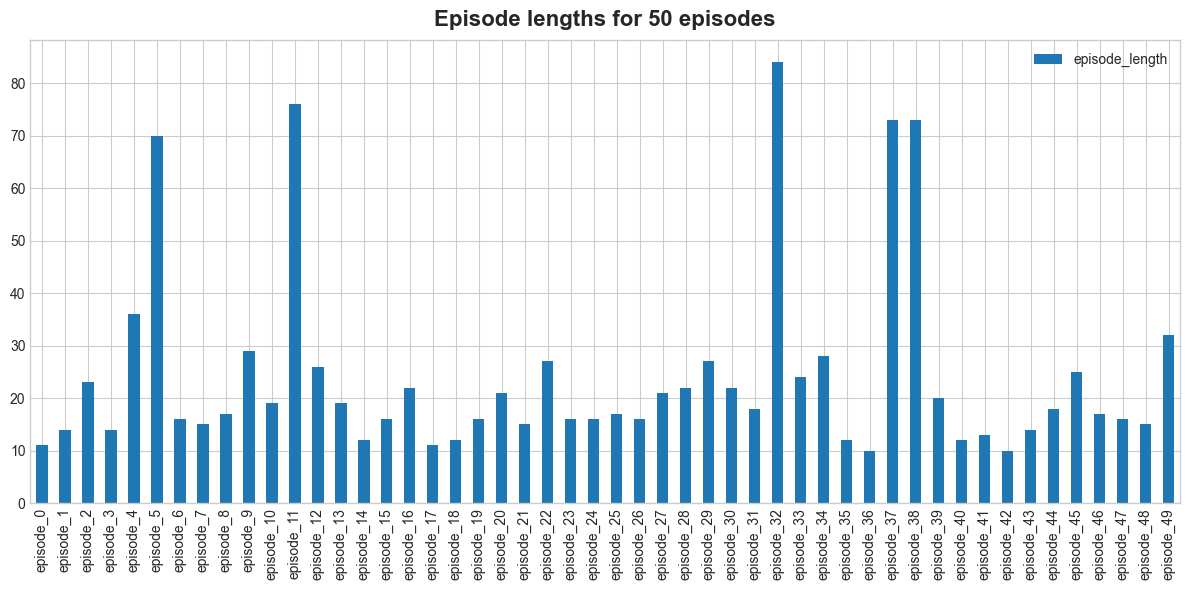

In [57]:
# reward is +1 for every step, so the scores are just the episode lengths
results = {ep:len(scores) for ep, scores in episode_scores.items()}
pd.DataFrame(results, index=['episode_length']).T.plot(kind='bar')
plt.title(f'Episode lengths for {num_episodes} episodes')
plt.show()

### 2. Tabular Q-learning (if state space is discretized):

**Objective**: Grasp the concept of value-based learning.

**Task**:
- Discretize the state space into bins.
- Create a Q-table with state-action pairs.
- Implement the Q-learning algorithm to update Q-values.
- Choose actions using an epsilon-greedy policy.

**Expected Outcome**:
- Initial unstable results, but with enough episodes and appropriate hyperparameters, you should see improvements in the agent's performance.



### 3. Policy Gradient using Neural Networks:

**Objective**: Transition from tabular methods to function approximators like neural networks.

**Task**:
- Use a neural network to estimate the policy.
- Implement the REINFORCE algorithm or a similar vanilla policy gradient method.
- Update the policy based on the received rewards.

**Expected Outcome**:
- The agent will learn to balance the pole for longer durations.
- Understanding of how neural networks can be used in RL.



### 4. Deep Q-learning:

**Objective**: Learn how to use deep neural networks in value-based methods.

**Task**:
- Use a neural network as a Q-function approximator.
- Implement the DQN algorithm with experience replay and target networks.

**Expected Outcome**:
- Improved stability compared to simple Q-learning due to the use of neural networks and experience replay.
- Understanding of challenges like overestimation bias in Q-learning and the need for techniques like target networks.



### 5. Advanced DQN Variants:

**Objective**: Dive deeper into challenges and improvements in value-based deep RL.

**Task**:
- Explore algorithms like Double DQN, Dueling DQN, and Prioritized Experience Replay.
- Integrate these techniques into your DQN implementation.

**Expected Outcome**:
- Improved performance and stability.
- Comprehensive understanding of challenges in deep Q-learning and the methodologies to mitigate them.



### 6. Actor-Critic Methods:

**Objective**: Combine the benefits of value-based and policy-based methods.

**Task**:
- Implement a basic Actor-Critic model.
- Extend it to methods like Deep Deterministic Policy Gradient (DDPG) or Proximal Policy Optimization (PPO), even though these might be overkill for CartPole.

**Expected Outcome**:
- A balanced understanding of how value and policy methods can be combined.
- Familiarity with advanced RL algorithms.


## Random action

In [4]:
env = gym.make("LunarLander-v2", render_mode="human")

In [10]:
# 
env.action_space

Discrete(4)

In [7]:
episodes = 10
for episode in range(episodes+1):

    # reset the evironment for each episode
    observation = env.reset()
    score = 0
    done = False 
    
    while not done:

        # possible actions at each step: do nothing, fire the main engine, fire the left orientation engine, or fire the right orientation engine 
        action = env.action_space.sample()  
        observation, reward, terminated, truncated, info = env.step(action)
        score += reward
        env.render()
        print(f"Episode: {episode} Score: {score}", end="\r")

        if terminated or truncated:
            done = True

env.close()